# Name : Yunhu Kim
# Student Number : 2018120195
# GitHub link : https://github.com/yunhu0110/assignment01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LSA function

In [2]:
def LSA(xMat,yMat) :
    xTx= np.dot(xMat.T,xMat)
    middle=np.dot(np.linalg.inv(xTx),xMat.T)
    ws=np.dot(middle,yMat)
    return (ws)

# A +sqrt(lambda)l

In [4]:
def genLamda(la,degree,x):
    A= genMat(degree,x)
    Iam= np.identity(np.size(A,1))
    sqrtla= la**(1/2.0)
    AA=np.concatenate((A,sqrtla*Iam), axis=0)
    
    return(AA)

# Automatically generating  A

In [3]:
def Autogen(degree,x) :    
    Vec1=np.ones(x.size)
    Vec1=np.reshape(Vec1,(x.size,1))
    xMat= Vec1
    
    for i in range(degree):
        result=np.reshape(x**(i+1),(x.size,1))
        xMat=np.hstack((xMat,result))
    
    return(xMat)

# yHat

In [6]:
def YHat(lam,degree,x,y1):
    
    A=genMat(degree,x)
    AA= genRegMat(lam,degree,x)
    YY= genYMat(degree+1,y1)

    ws=leastsquareApprox(AA,YY)
    yHat=np.dot(A,ws)
    
    return(yHat)

#  y + 0 

In [5]:
def Y0(A,y):
    Vec0= np.zeros(A)
    Mat0=np.reshape(Vec0,(Vec0.size,1))
    YY=np.concatenate((y,Vec0), axis=0)
    
    return(YY)

# Noisy and clean data

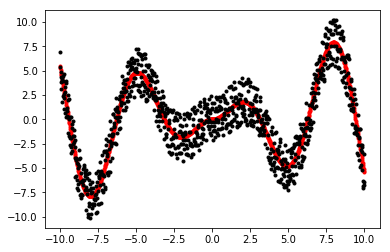

In [7]:
num     = 1001
std     = 5 
def fun(x):
 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'r.', x, y2, 'k.')
plt.show()

# Plot the p = 6,7 and $\lambda$ =1

Text(0.5,1,'degree=7')

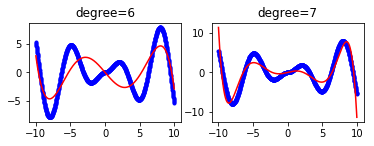

In [8]:
lam =1

plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(la,6,x,y1), 'r-')
plt.title('degree=6')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(la,7,x,y1), 'r-')
plt.title('degree=7')


# Plot the lambda = 2^{-3},2^{-1},2^{1},2^{3} and p= 9

Text(0.5,1,'lambda=2^-1')

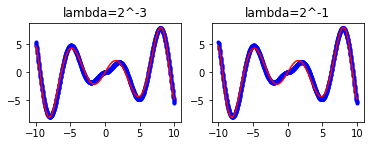

In [10]:
plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(2**-3,9,x,y1), 'r-')
plt.title('lambda=2^-3')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(2**-1,9,x,y1), 'r-')
plt.title('lambda=2^-1')

Text(0.5,1,'lambda=2^3')

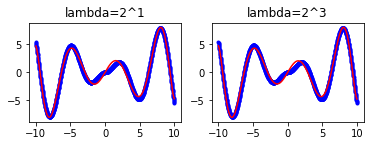

In [11]:
plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(2,9,x,y1), 'r-')
plt.title('lambda=2^1')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(2**3,9,x,y1), 'r-')
plt.title('lambda=2^3')

# Plot the energy 

In [12]:
error=[]
for i in range(8):
    Error= np.linalg.norm(YHat(2**(i-3),9,x,y1) - y1)
    error.append(Error)

la= []
for i in range(8):
    newLa= i-3
    la.append(newLa)


Text(0,0.5,'error')

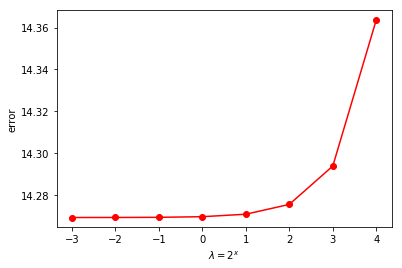

In [13]:
plt.plot(la, error,'ro-')
plt.xlabel('$\lambda=2^x$')
plt.ylabel('error')